# Наискорейший спуск на сфере
## Постановка задачи
$$\underset{\| x \|^2 - 1 = 0}{min} f(x) = x^T A x$$


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## В следующей ячейке в первой строке задается матрица квадратичной формы.
### Далее заранее обсчитываются квадрат и куб этой матрицы, задается начальное приближение, потом сразу же проецируется на сферу.

In [2]:
A = np.array([[1., 1., -1.], [1., 100., 0], [-1.,0,1.]])

In [3]:
print A


[[   1.    1.   -1.]
 [   1.  100.    0.]
 [  -1.    0.    1.]]


## В следующей ячейке задается функция, которая возвращает значение второй производной целевой функции при выборе шага (см pdf)
$$F'' = \frac{\gamma^3 (-2a_2\widehat{a_2} )+ \gamma^2 (-3a_2\widehat{a_1}) + \gamma(2\widehat{a_2}a_0 - 4a_2\widehat{a_0} + 2a_1\widehat{a_1}) + \widehat{a_1}a_0 + 4a_1\widehat{a_0}}{(\gamma^2 a_2 - 2\gamma a_1 + a_0)^3},$$


$$a_i = {x^k}^T A^i x^k, i = 0,1,2,3$$


In [4]:
def F2(gamma, a2, a2t, a1t, a0, a0t, a1):
    return (gamma**3 * (-2.*a2*a2t) + gamma**2 * (-3. * a2 * a1t) + gamma * (2.*a2t * a0 - 4. * a2 * a0t + 2. * a1 * a1t) + a1t * a0 + 4. * a1 * a0t) / (a2 * gamma**2 - 2. * gamma * a1 + a0)**3

# Далее идет сам метод
Шаги вычисляются в соответствии с написанным в статье, с подстраховской на тот случай, если коэффициент при $\gamma^2$ обратится в ноль (помечено "!")

In [5]:
def method(A, x0, print_rate):
    x = x0 / np.linalg.norm(x0)
    A_sq = A.dot(A)
    A_th = A.dot(A_sq)
    notenough = True
    prevx = x
    i = 0
    while(notenough):
        a0 = x.T.dot(x)
        a1 = x.T.dot(np.dot(A,x))
        a2 = x.T.dot(np.dot(A_sq,x))
        a3 = x.T.dot(np.dot(A_th,x))
        a2t = a2**2 - a3 * a1
        a1t = a3 * a0 - a2 * a1
        a0t = a1**2 - a0 * a2
        """
        print a0
        print a1
        print a2
        print a3
        print '_____'
        print a2t
        print a1t
        print a0t
        """
        if (a2**2 - a3 * a1) != 0:
            if i % print_rate == 0:
                print 'case quadr'
            gamma1 = ((a2 * a1 - a3 * a0) + np.sqrt((a2 * a1 - a3 * a0)**2 - (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma2 = ((a2 * a1 - a3 * a0) - np.sqrt((a2 * a1 - a3 * a0)**2 - (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma_list = []
            for gamma in [gamma1, gamma2]:
                if gamma >=0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    gamma_list.append(gamma)
            #print 'gamma_list len = ', len(gamma_list)
            if len(gamma_list) > 0:
                final_gamma = gamma_list[np.random.randint(len(gamma_list))]
            else:
                if i % print_rate == 0:
                    print 'there is no suitable gamma. shaking point'
                x = np.random.randn(A.shape[0])
                x = x / np.linalg.norm(x)
                continue
            if i % print_rate == 0:
                print 'quadr gamma = ', final_gamma 
            x = (x - final_gamma * np.dot(A, x))/ np.linalg.norm(x - final_gamma * np.dot(A, x))
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        if  (a2**2 - a3 * a1) == 0 and (a3 * a0 - a2 * a1) != 0:
            if i % print_rate == 0:
                print 'case linear'
            gamma = (a1**2 - a0 * a2)/(a3 * a0 - a2 * a1)
            if gamma > 0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    x = (x - gamma * np.dot(A, x))/ np.linalg.norm(x - gamma * np.dot(A, x))
            else:
                if i % print_rate == 0:
                    print 'you got no suitable gamma. shaking point'
                x = np.random.randn(A.shape[0])
                x = x / np.linalg.norm(x)
                continue
        if (a3 * a0 - a2 * a1) == 0 and (a2**2 - a3 * a1) == 0:
            if i % print_rate == 0:
                print 'you got rekt'
                print 'iternum = ', i
                print '(a3 * a0 - a2 * a1)', (a3 * a0 - a2 * a1)
                print '(a2**2 - a3 * a1)', (a2**2 - a3 * a1)
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
        if i % print_rate == 0:
            print 'iter_num = ', i
            print x
        if (np.linalg.norm(x - prevx) < 1e-6):
            notenough = False
        else:
            prevx = x
        xs.append(x)
        fs.append(x.dot(np.dot(A,x)))
        i += 1
    return x

# Начальная точка (1, 0, 1)

In [9]:
x0 = np.array([1., 0., 1.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
quadr gamma =  0.00249996875078
iter_num =  0
[ 0.70710568 -0.00176774  0.70710568]
case quadr
quadr gamma =  0.0361240783536
iter_num =  20
[ 0.70750225 -0.00704957  0.70667593]
case quadr
quadr gamma =  0.00781413789622
iter_num =  40
[ 0.70846229 -0.00708255  0.70571313]
case quadr
quadr gamma =  0.00633383907512
iter_num =  60
[ 0.7087422  -0.00708611  0.70543198]


In [10]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224273369
x* =  [ 0.70881806 -0.00708741  0.70535575]
norm check:  1.0


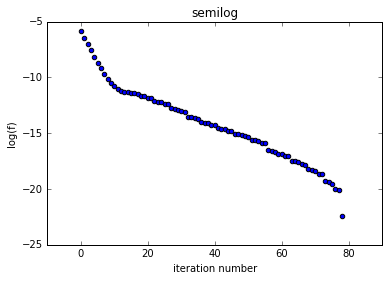

In [11]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (0, 1, 0)

In [13]:
x0 = np.array([0., 1., 0.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
there is no suitable gamma. shaking point
case quadr
there is no suitable gamma. shaking point
case quadr
there is no suitable gamma. shaking point
case quadr
there is no suitable gamma. shaking point
case quadr
quadr gamma =  0.00246754236925
iter_num =  0
[ 0.82704583 -0.40807419 -0.38661434]
case quadr
quadr gamma =  0.00249975253082
iter_num =  20
[ 0.65103735  0.22570149  0.72471319]
case quadr
quadr gamma =  0.0148385730099
iter_num =  40
[ 0.67237003 -0.00692851  0.74018277]
case quadr
quadr gamma =  0.0110623869957
iter_num =  60
[ 0.69880846 -0.00700157  0.71527457]
case quadr
quadr gamma =  0.00579995600015
iter_num =  80
[ 0.70662735 -0.00708823  0.70755039]
case quadr
quadr gamma =  0.0176095418618
iter_num =  100
[ 0.70830851 -0.00708722  0.70586743]
case quadr
quadr gamma =  0.0255345707323
iter_num =  120
[ 0.70867099 -0.00708882  0.70550349]
case quadr
quadr gamma =  0.00780623364149
iter_num =  140
[ 0.70879223 -0.00708782  0.70538169]


In [14]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224089195
x* =  [ 0.70881223 -0.00708734  0.7053616 ]
norm check:  1.0


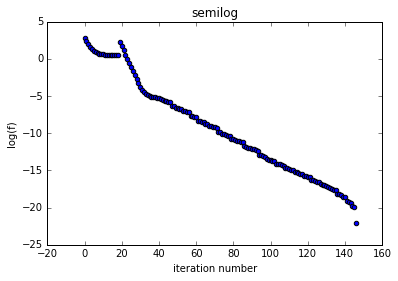

In [15]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(np.hstack((fminfstar[:np.argmin(fs)], fminfstar[np.argmin(fs) + 1:])))

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (-1, 1, 3)

In [16]:
x0 = np.array([-1., 1., 3.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
quadr gamma =  0.00247177816264
iter_num =  0
[-0.30636981  0.23312799  0.92292409]
case quadr
quadr gamma =  0.00257967013089
iter_num =  20
[ 0.14189743 -0.0364821  -0.98920886]
case quadr
quadr gamma =  0.00251208846513
iter_num =  40
[ 0.621046   -0.03043122  0.78318312]
case quadr
quadr gamma =  0.125555304333
iter_num =  60
[ 0.67489726 -0.00674201  0.73788091]
case quadr
quadr gamma =  0.0108330791782
iter_num =  80
[ 0.70535518 -0.0070569   0.70881893]
case quadr
quadr gamma =  0.00622296421031
iter_num =  100
[ 0.70818369 -0.00707554  0.70599278]
case quadr
quadr gamma =  0.00561442100428
iter_num =  120
[ 0.70863747 -0.00708359  0.70553721]
case quadr
quadr gamma =  0.0473792149526
iter_num =  140
[ 0.70880543 -0.00708876  0.70536842]


In [17]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224513479
x* =  [ 0.70882743 -0.00708772  0.70534633]
norm check:  1.0


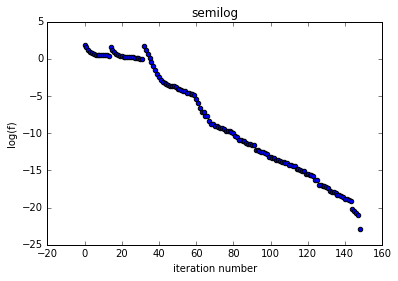

In [18]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (-1, -30, 3)

In [19]:
x0 = np.array([-1., -30., 3.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
there is no suitable gamma. shaking point
case quadr
quadr gamma =  0.00249782246638
iter_num =  0
[ 0.74684356 -0.48976152  0.44984259]
case quadr
quadr gamma =  0.00743924480935
iter_num =  20
[ 0.83272767 -0.00904046  0.55360897]
case quadr
quadr gamma =  0.0955773036177
iter_num =  40
[ 0.74644219 -0.00839858  0.66539726]
case quadr
quadr gamma =  0.0110073315098
iter_num =  60
[ 0.72137613 -0.0072351   0.69250569]
case quadr
quadr gamma =  0.104243471451
iter_num =  80
[ 0.71148829 -0.00717258  0.70266135]
case quadr
quadr gamma =  0.0147142128125
iter_num =  100
[ 0.70944737 -0.00709077  0.70472275]
case quadr
quadr gamma =  0.0063450825335
iter_num =  120
[ 0.70901726 -0.00709119  0.70515547]
case quadr
quadr gamma =  0.105232970853
iter_num =  140
[ 0.70889726 -0.00708955  0.70527613]


In [20]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224530388
x* =  [ 0.70888065 -0.0070885   0.70529283]
norm check:  1.0


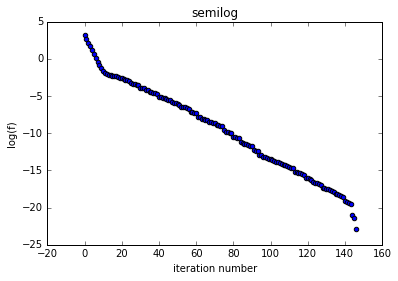

In [21]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

# Начальная точка (9, -30, 3)

In [22]:
x0 = np.array([9., -30., 3.])
xs = []
fs = []
x = method(A, x0, 20)

case quadr
there is no suitable gamma. shaking point
case quadr
there is no suitable gamma. shaking point
case quadr
there is no suitable gamma. shaking point
case quadr
there is no suitable gamma. shaking point
case quadr
there is no suitable gamma. shaking point
case quadr
quadr gamma =  0.00247676071469
iter_num =  0
[-0.24353001 -0.15620386  0.9572322 ]
case quadr
quadr gamma =  0.00252994453421
iter_num =  20
[-0.59521     0.02567275 -0.80315999]
case quadr
quadr gamma =  0.00924541116703
iter_num =  40
[-0.65117645  0.00642957 -0.75889913]
case quadr
quadr gamma =  0.00719450649398
iter_num =  60
[-0.69833869  0.00692124 -0.71573401]
case quadr
quadr gamma =  0.00557831592353
iter_num =  80
[-0.70549635  0.00701651 -0.70867882]
case quadr
quadr gamma =  0.0189517203766
iter_num =  100
[-0.70826137  0.00707652 -0.70591484]
case quadr
quadr gamma =  0.015875737339
iter_num =  120
[-0.70872844  0.00708778 -0.70544579]


In [23]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -0.00501224390062
x* =  [-0.70882228  0.00708824 -0.7053515 ]
norm check:  1.0


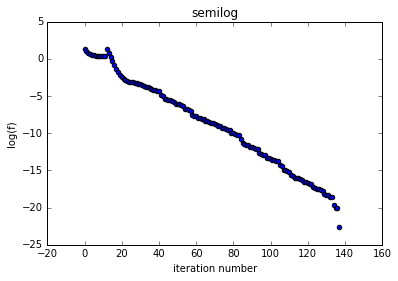

In [24]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()